In [1]:
import pandas as pd
import numpy as np

# Data Visualization packages
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#garbage collector - To free up unused space
import gc
gc.collect()

#NetworkX
import networkx as nx
import plotly.graph_objects as go #To construct network graphs

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis pacakages:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Facebook Prophet packages:
#from fbprophet import Prophet
#from fbprophet.diagnostics import cross_validation, performance_metrics
#from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

#Time -To find how long each cell takes to run
import time
from datetime import datetime
import nbformat

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [2]:
data = pd.read_csv('btcusd_1-min_data.csv')
data

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7414233,1.770336e+09,62822.00,62946.00,62788.00,62900.00,9.240580
7414234,1.770336e+09,62900.00,63037.00,62900.00,62992.00,3.786227
7414235,1.770336e+09,62992.00,63034.00,62829.00,62991.00,10.887731
7414236,1.770336e+09,62992.00,63018.00,62854.00,62864.00,9.079134


In [3]:
print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(7414238, 6)

Data types of data columns: 
Timestamp    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
dtype: object


## Exploratory Data Analytics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414238 entries, 0 to 7414237
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 339.4 MB


In [5]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.414238e+06,7.414238e+06,7.414238e+06,7.414238e+06,7.414238e+06,7.414238e+06
mean,1.547844e+09,2.212769e+04,2.213554e+04,2.211965e+04,2.212770e+04,5.087814e+00
std,1.284256e+08,3.069824e+04,3.070653e+04,3.068985e+04,3.069824e+04,2.193329e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.436626e+09,4.476900e+02,4.478700e+02,4.475000e+02,4.476900e+02,2.016000e-02
50%,1.547839e+09,7.456895e+03,7.460795e+03,7.452290e+03,7.456750e+03,4.493684e-01
75%,1.659053e+09,3.387085e+04,3.389449e+04,3.384900e+04,3.387249e+04,2.872936e+00
max,1.770336e+09,1.262020e+05,1.262720e+05,1.261580e+05,1.262020e+05,5.853852e+03


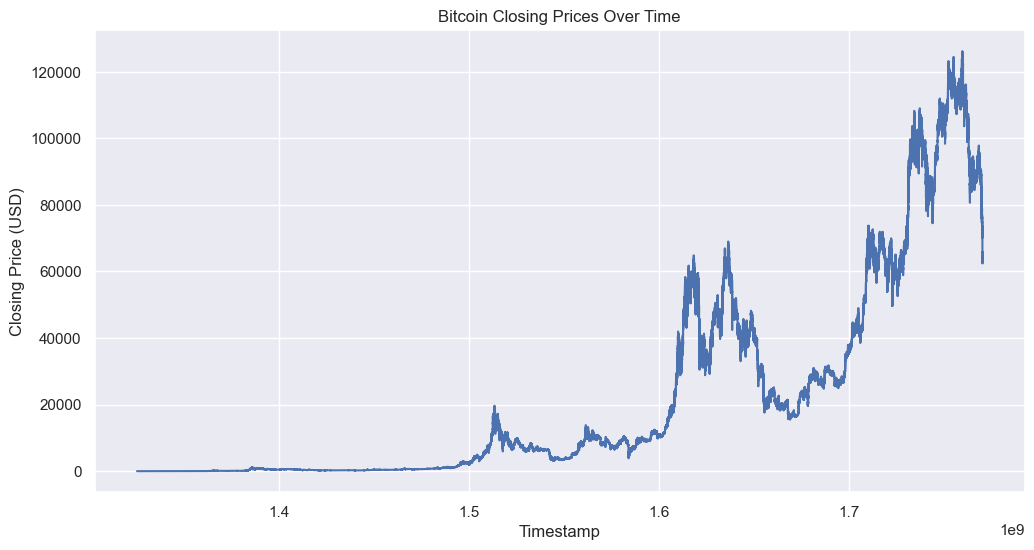

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Timestamp', y='Close')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price (USD)')
plt.show()

## Data Preprocessing

the data is available based on hours, so we need to resample them to day based.

In [7]:
data['Timestamp'] = [datetime.fromtimestamp(x) for x in data['Timestamp']]
data = data.set_index('Timestamp')
data = data.resample("24H").mean()
data.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01,4.580000,4.580000,4.580000,4.580000,0.000000
2012-01-02,4.890778,4.890778,4.890778,4.890778,0.013958
2012-01-03,5.003333,5.003333,5.003333,5.003333,0.014908
2012-01-04,5.171833,5.171833,5.171833,5.171833,0.067790
2012-01-05,5.619444,5.619660,5.619444,5.619660,0.114218


check missing value

In [8]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Volume'] = df['Volume'].interpolate()
    print(f'{m_}No. of Missing values after interpolation:\n{y_}{df.isnull().sum()}')
    
fill_missing(data)

No. of Missing values after interpolation:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [9]:
new_df = data.groupby('Timestamp').mean()
new_df = new_df[['Volume', 'Close']]
new_df.rename(columns={'Volume': 'volume_mean', 'Close': 'close_mean'}, inplace=True)
new_df.head()

,volume_mean,close_mean
Timestamp,,
2012-01-01,0.000000,4.580000
2012-01-02,0.013958,4.890778
2012-01-03,0.014908,5.003333
2012-01-04,0.067790,5.171833
2012-01-05,0.114218,5.619660


In [10]:
data_df = data.merge(new_df, left_on='Timestamp', right_index=True)
data_df['Volume'] = data_df['Volume'] / data_df['volume_mean']

data_df['Close'] = data_df['Close'] / data_df['close_mean']
data_df['Open/Close'] = data_df['Open'] / data_df['Close']
data_df['Gap'] = data_df['High'] / data_df['Low']
data_df.head()

,Open,High,Low,Close,Volume,volume_mean,close_mean,Open/Close,Gap
Timestamp,,,,,,,,,
2012-01-01,4.580000,4.580000,4.580000,1.0,NaN,0.000000,4.580000,4.580000,1.000000
2012-01-02,4.890778,4.890778,4.890778,1.0,1.0,0.013958,4.890778,4.890778,1.000000
2012-01-03,5.003333,5.003333,5.003333,1.0,1.0,0.014908,5.003333,5.003333,1.000000
2012-01-04,5.171833,5.171833,5.171833,1.0,1.0,0.067790,5.171833,5.171833,1.000000
2012-01-05,5.619444,5.619660,5.619444,1.0,1.0,0.114218,5.619660,5.619444,1.000038


Sometimes, the data set might be too huge to process, since we are using dataframe. To make sure we dont hold up too much RAM. We could try other approaches like

1. use gc.collect() - collects all the garbage values

2. del dataframe - free up some space by deleting the unused dataframe using the del command

3. Reduce the memory usage based on the data types of the columns in the dataframe(shown below)

In [11]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
print(f'{m_}Memory of the dataframe:\n{y_}{mem_usage(data_df)}')

Memory of the dataframe:
0.39 MB


In [12]:
#All the columns in float64 format, we can downsize them to float32 to reduce memory usage 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5151 entries, 2012-01-01 to 2026-02-06
Freq: 24h
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         5151 non-null   float64
 1   High         5151 non-null   float64
 2   Low          5151 non-null   float64
 3   Close        5151 non-null   float64
 4   Volume       5144 non-null   float64
 5   volume_mean  5151 non-null   float64
 6   close_mean   5151 non-null   float64
 7   Open/Close   5151 non-null   float64
 8   Gap          5151 non-null   float64
dtypes: float64(9)
memory usage: 402.4 KB


We can use the function pd.to_numeric() to downcast our float types. We’ll use DataFrame.select_dtypes to select only the float columns, then we’ll optimize the types and compare the memory usage.

In [13]:
gl_float = data_df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['Before','After']
compare_floats.apply(pd.Series.value_counts)

,Before,After
float32,NaN,4
float64,9.0,5


In [14]:
print(f"{m_}Before float conversion:\n{y_}{mem_usage(data_df)}")
data_df[converted_float.columns] = converted_float
print(f"{m_}After float conversion:\n{y_}{mem_usage(data_df)}")

Before float conversion:
0.39 MB
After float conversion:
0.31 MB


## Exploratory Data Analytics (EDA)

In [15]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(25,10),sharex=True)
    sns.histplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

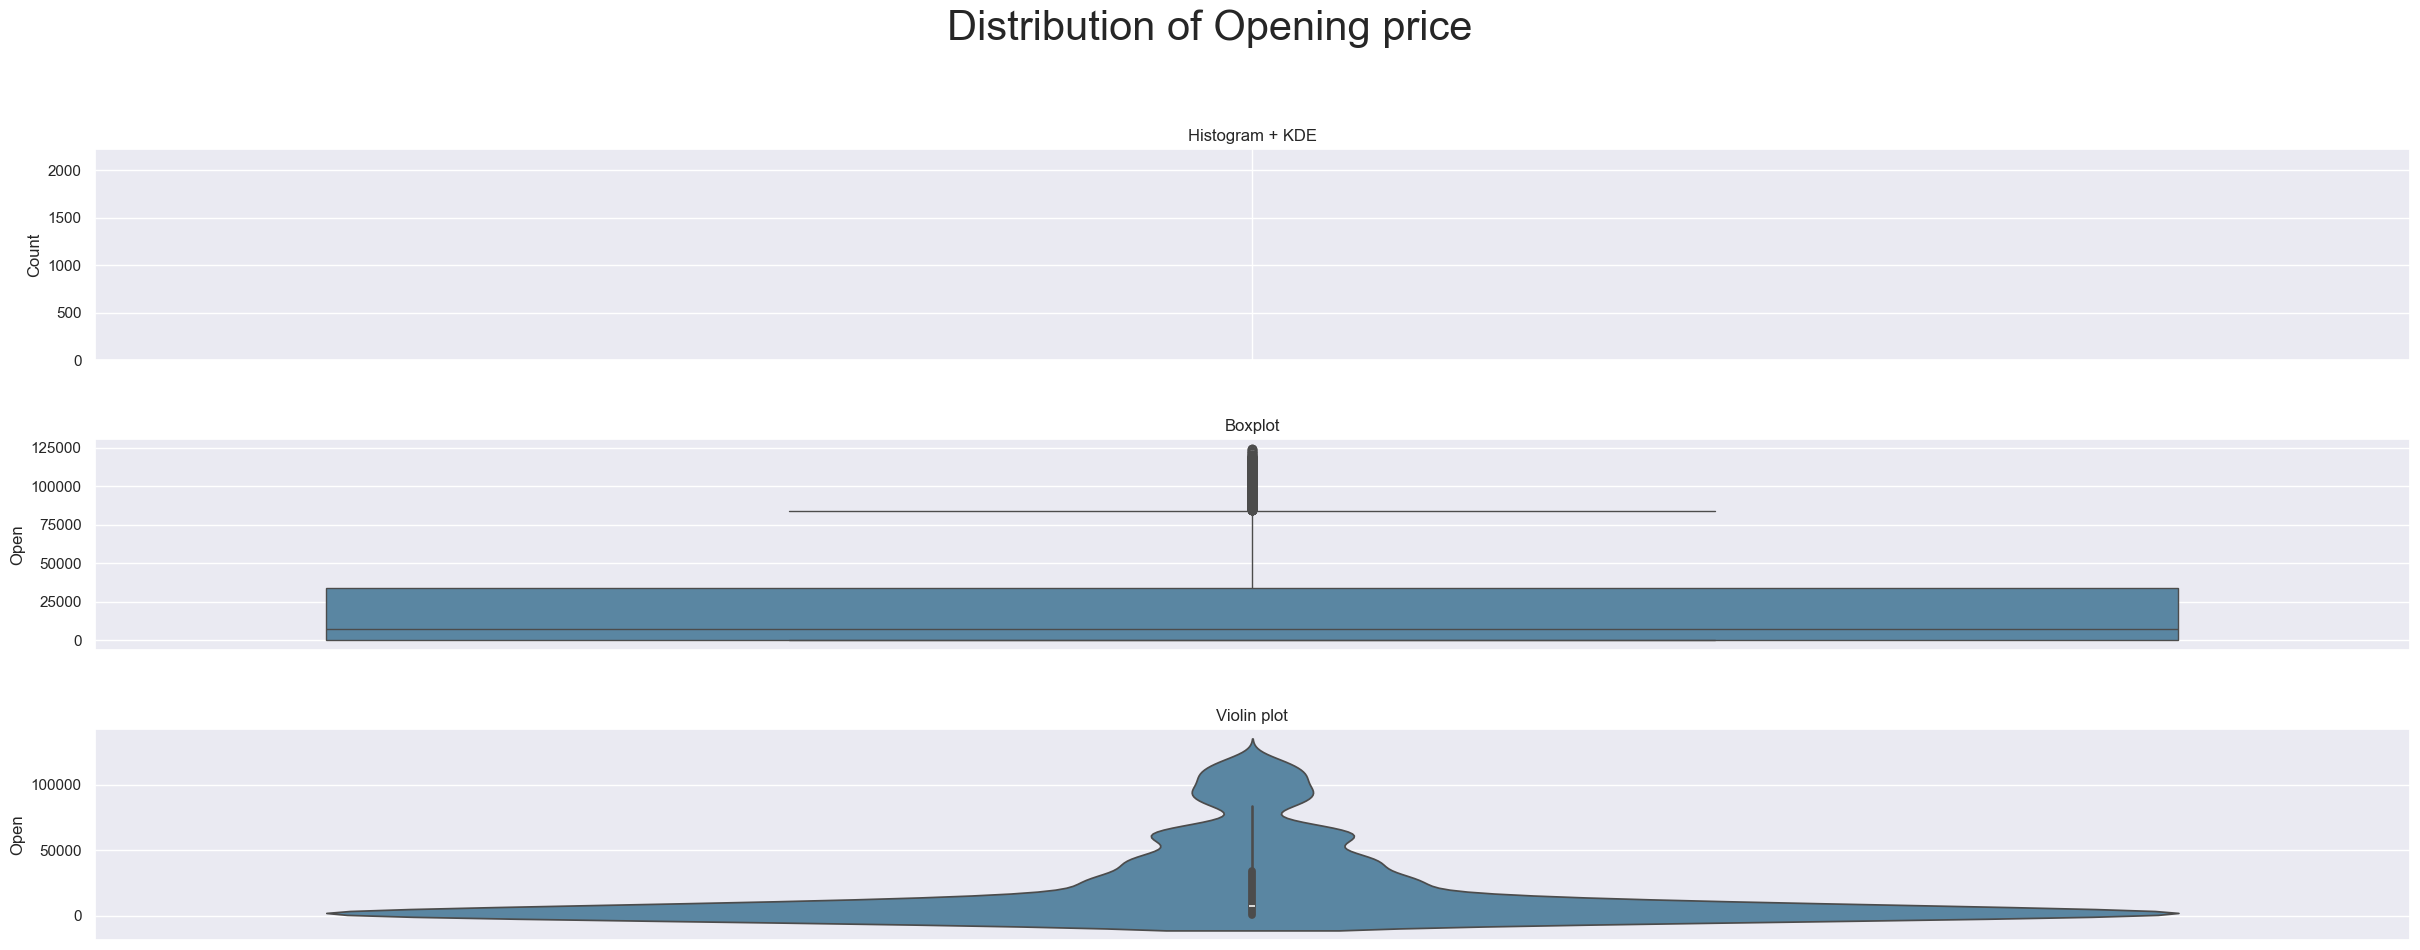

In [16]:
triple_plot(data['Open'],'Distribution of Opening price',custom_colors[0])

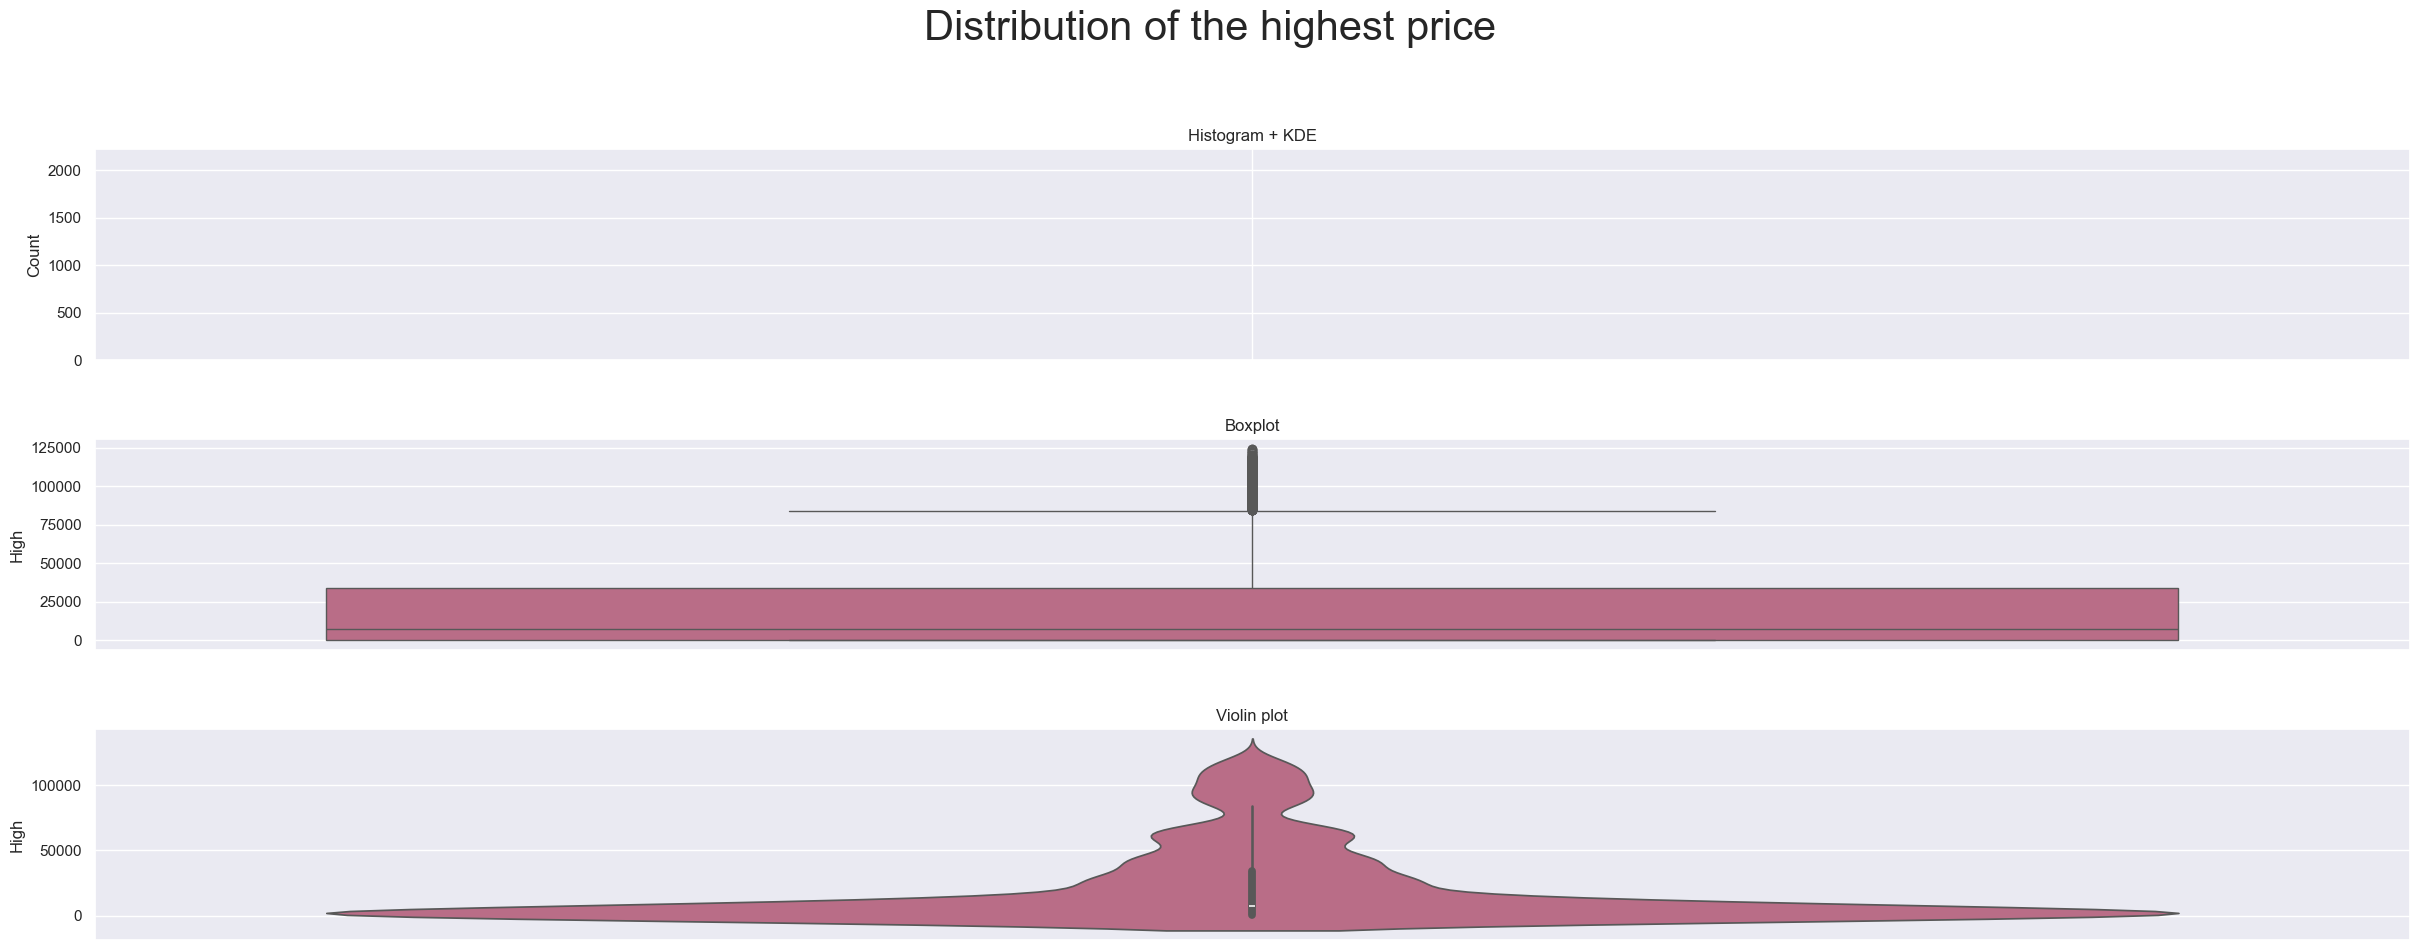

In [17]:
triple_plot(data['High'],'Distribution of the highest price',custom_colors[1])

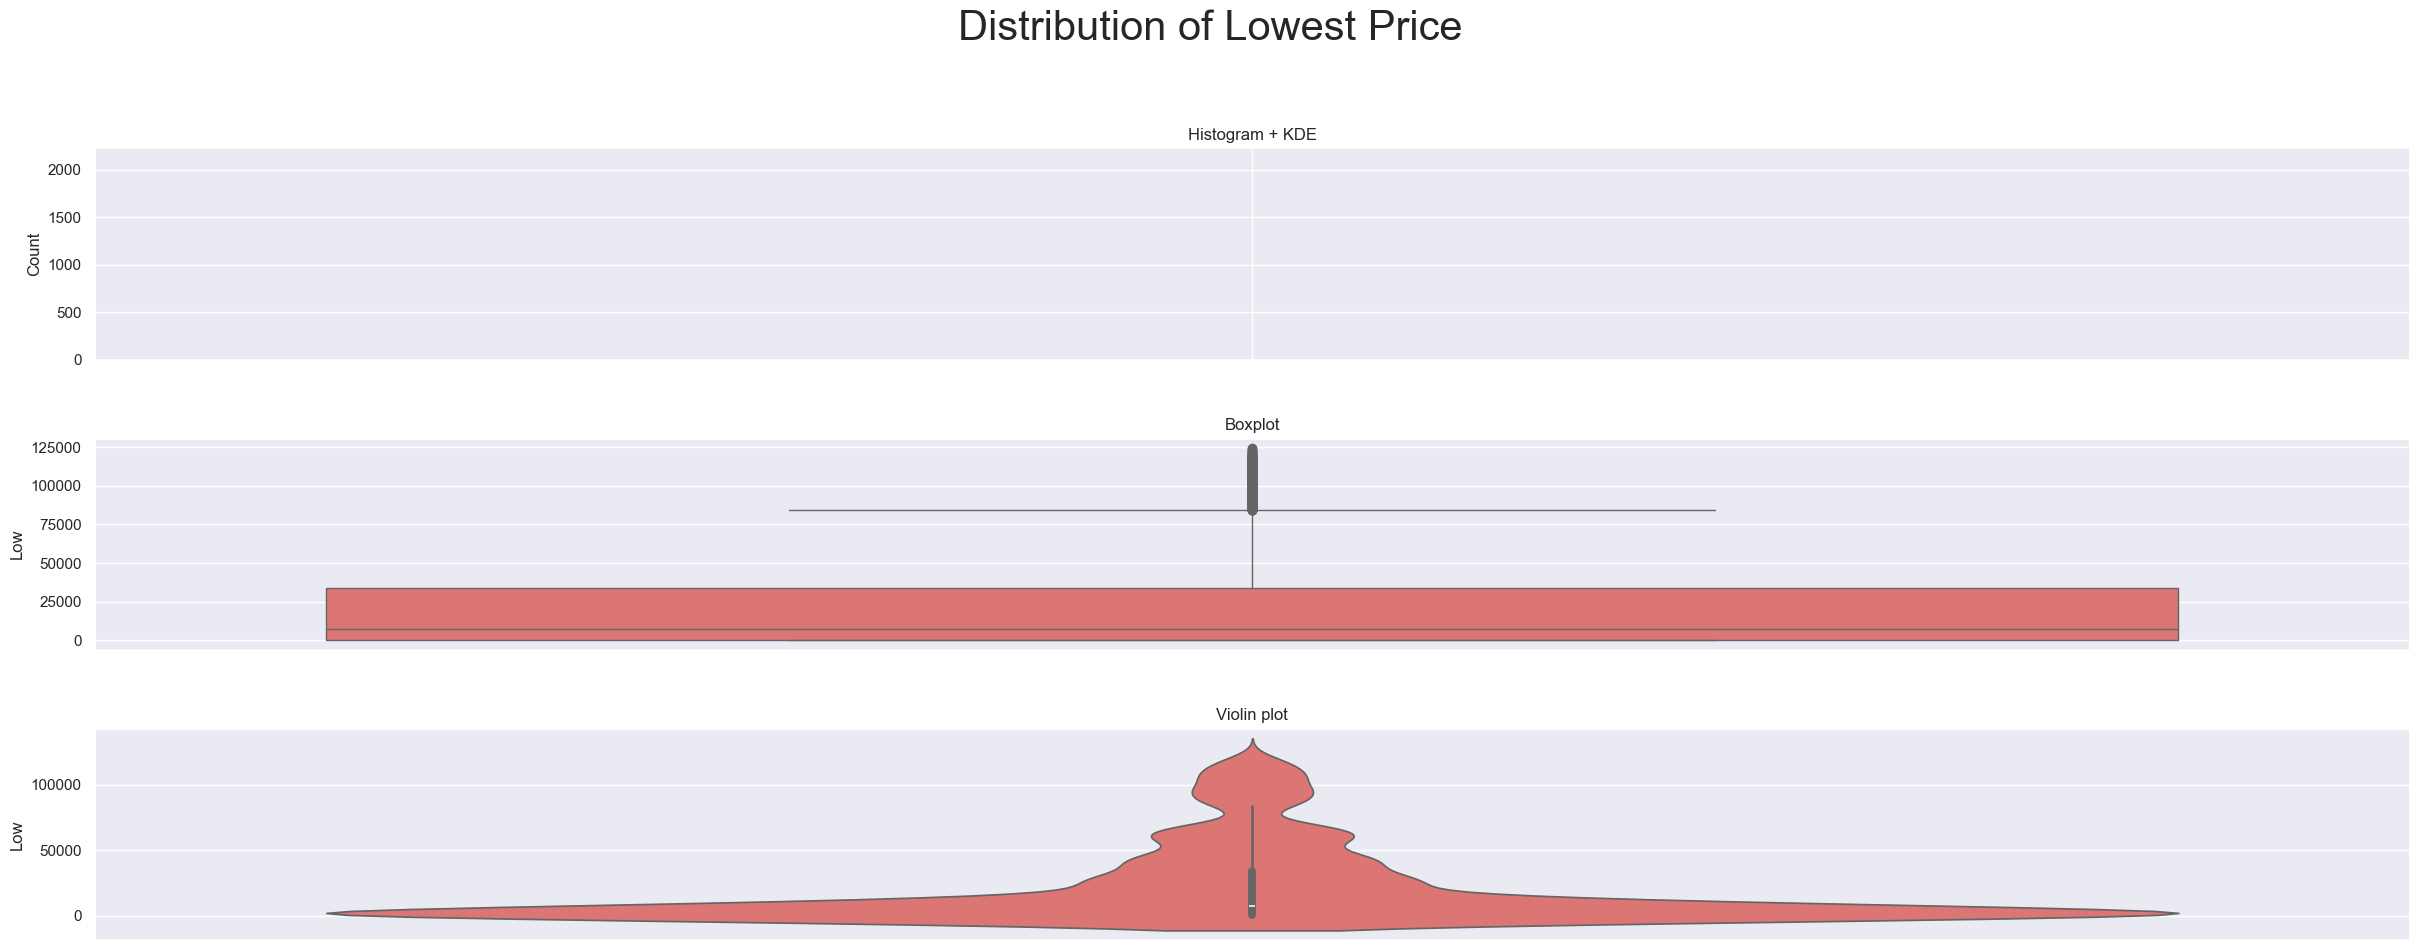

In [18]:
triple_plot(data['Low'],'Distribution of Lowest Price',custom_colors[2])

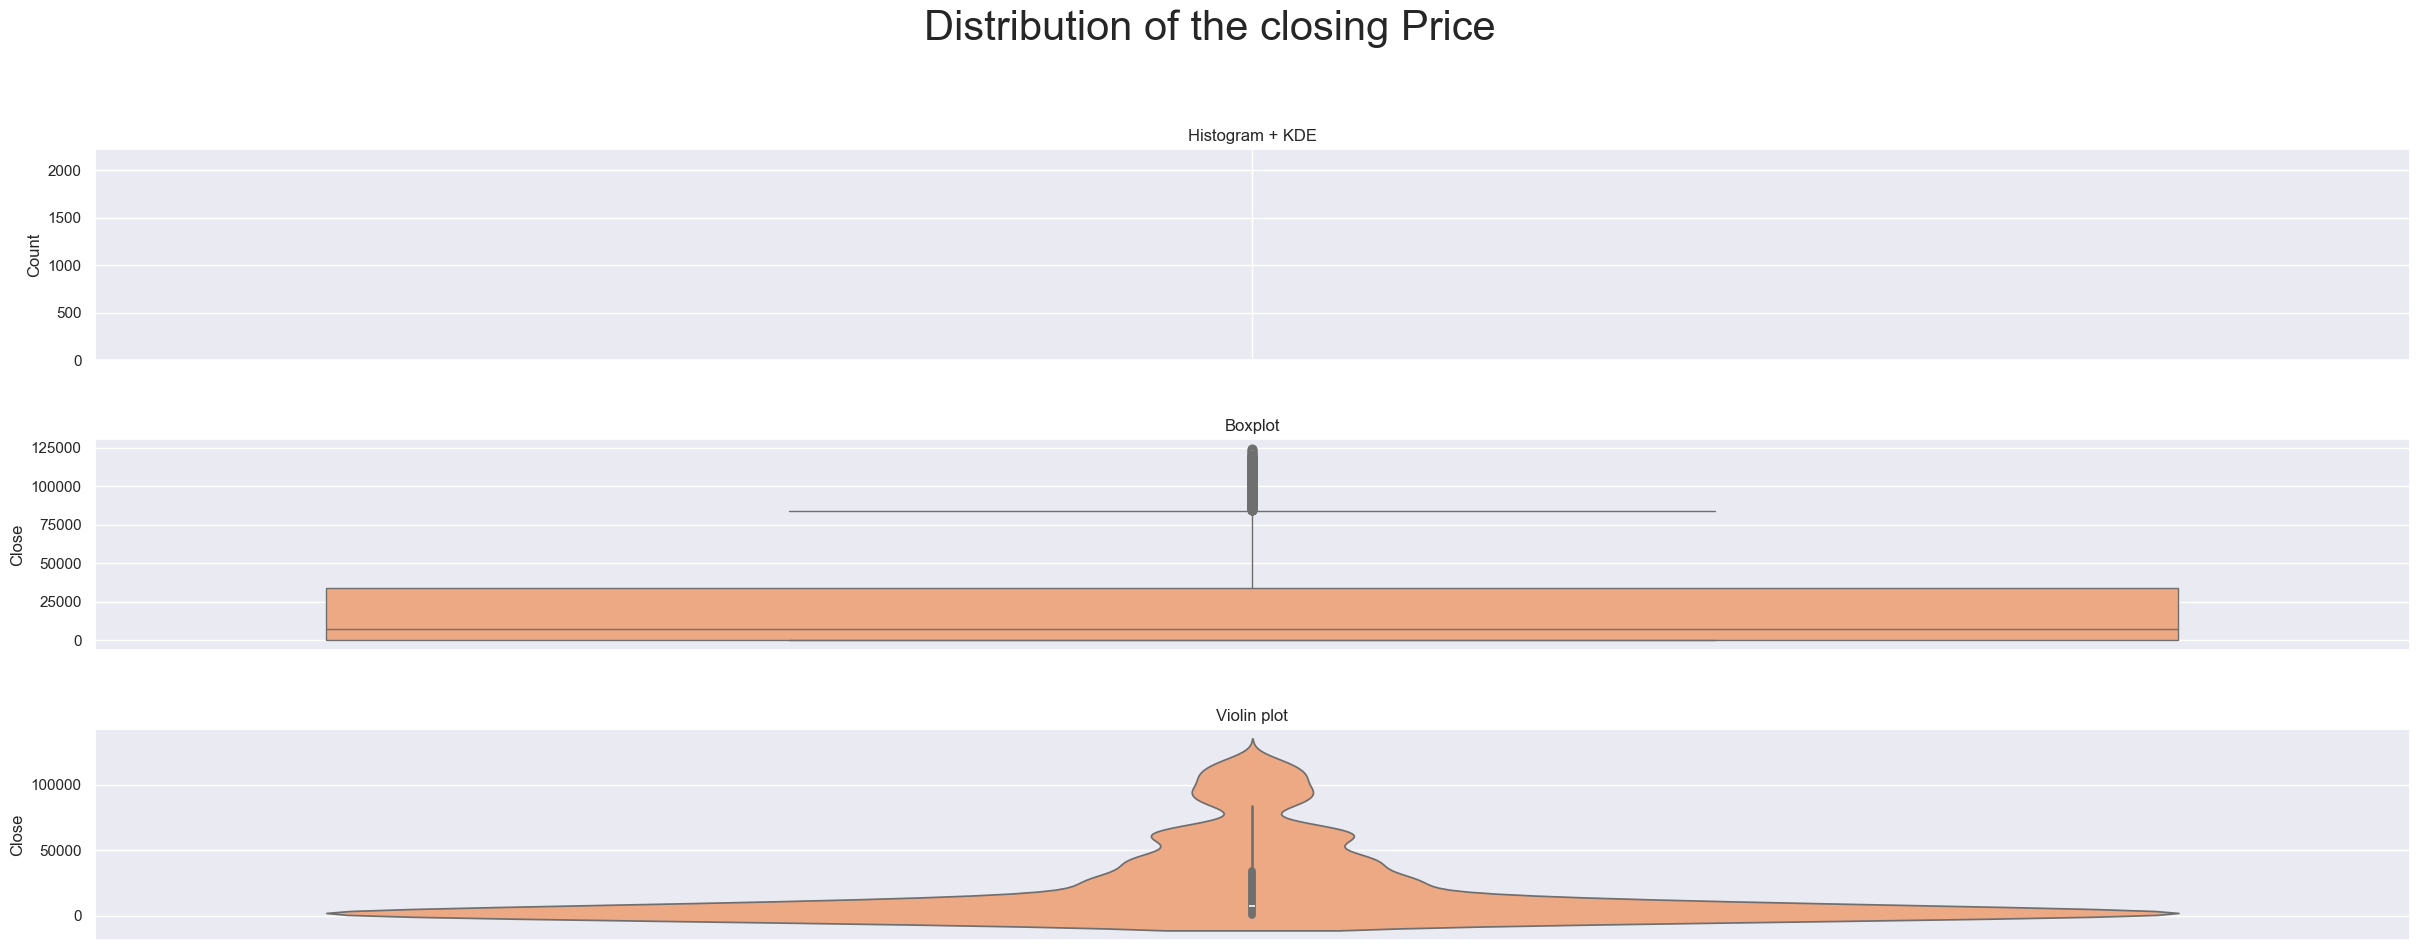

In [19]:
triple_plot(data['Close'],'Distribution of the closing Price',custom_colors[3])

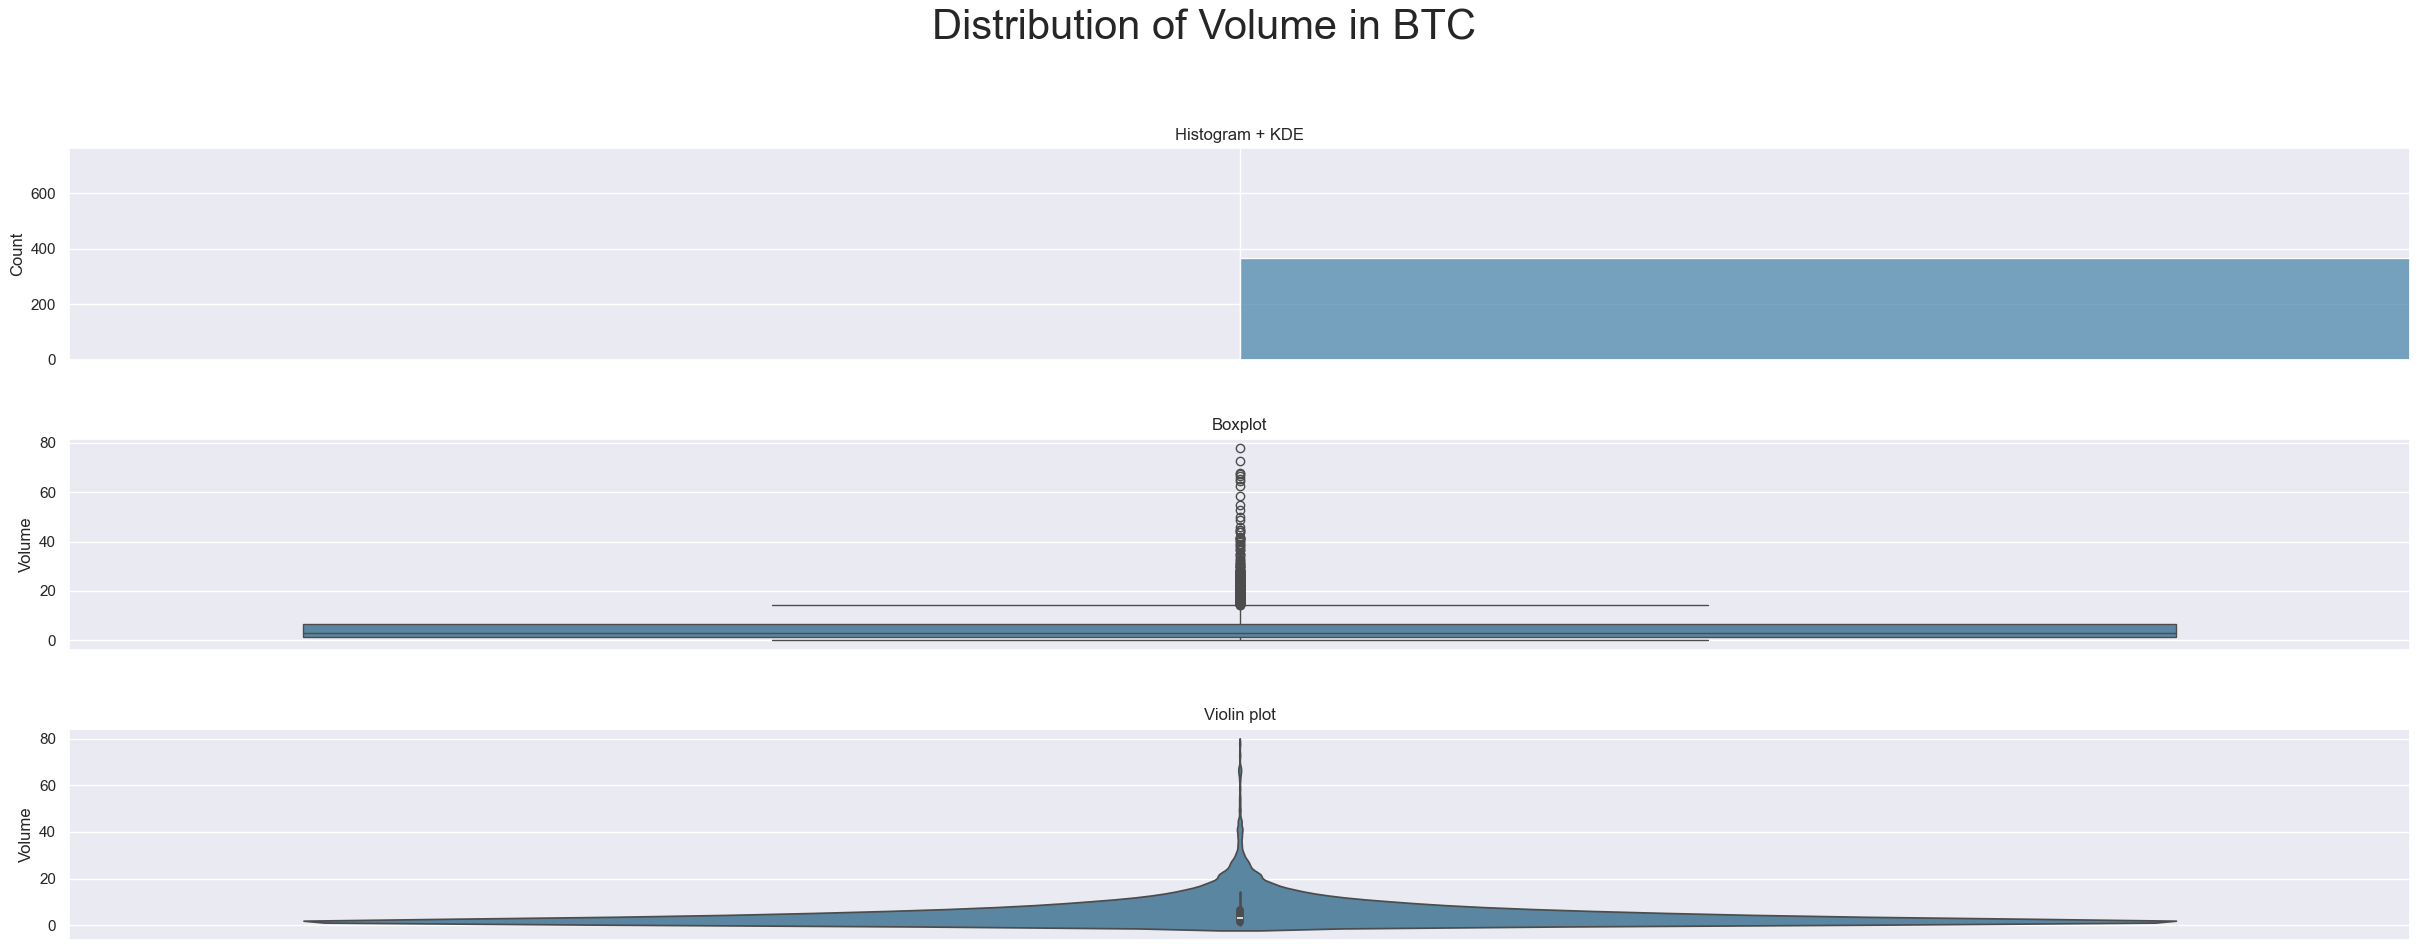

In [20]:
triple_plot(data['Volume'],'Distribution of Volume in BTC ',custom_colors[0])

Correlation Analysis

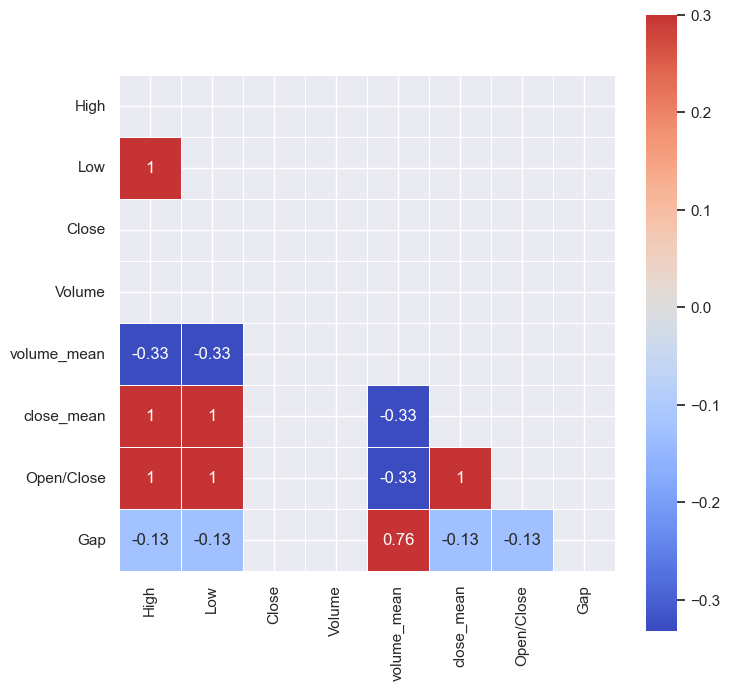

In [21]:
plt.figure(figsize=(8,8))
corr=data_df[data_df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data_df[data_df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [22]:
data_df=data_df.drop(columns=['volume_mean', 'close_mean'])
data_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Open/Close', 'Gap'], dtype='object')

Correlation Network

In [23]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_array(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])

In [24]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(9,9))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=13)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

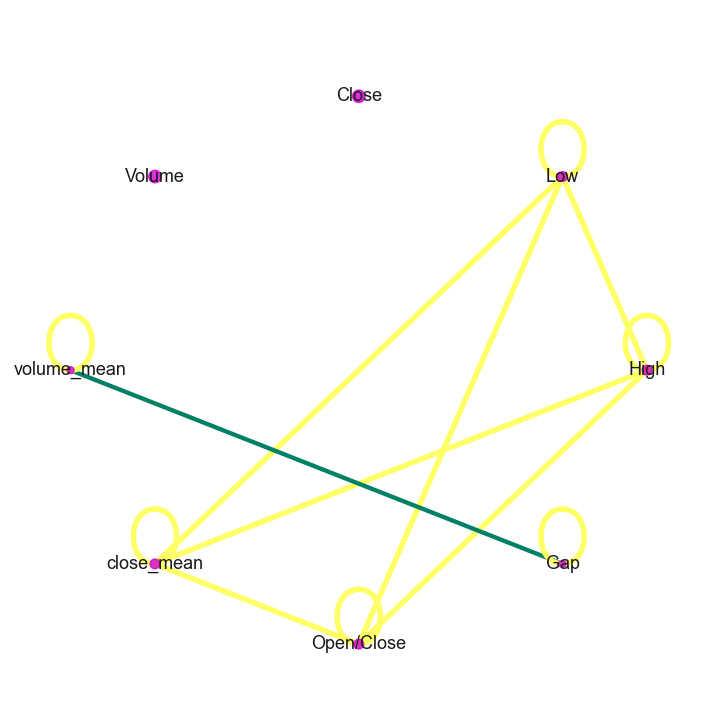

In [25]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)

In [26]:
trace1 = {
    'x': data_df.index,
    'open': data_df.Open,
    'close': data_df.Close,
    'high': data_df.High,
    'low': data_df.Low,
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': False
}
# Calculate and define moving average of 30 periods
avg_30 = data_df.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = data_df.Close.rolling(window=50, min_periods=1).mean()

trace2 = {
    'x': data_df.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

trace3 = {
    'x': data_df.index,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}
data_trace = [trace1, trace2, trace3]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Bitcoin Moving Averages',
        'font': {
            'size': 15
        } 
    }
})

fig = go.Figure(data=data_trace, layout=layout)
fig.write_html("Bitcoin Moving Averages.html")
fig.show()

What is Prophet?
Prophet is a facebooks’ open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

In [27]:
# Prepare data for Prophet
prophet_df = data.reset_index()[['Timestamp', 'Close']]
prophet_df.columns = ['ds', 'y']

prophet_df.head()

,ds,y
0,2012-01-01,4.580000
1,2012-01-02,4.890778
2,2012-01-03,5.003333
3,2012-01-04,5.171833
4,2012-01-05,5.619660


Train Prophet Model

In [28]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

model.fit(prophet_df)

13:27:20 - cmdstanpy - INFO - Chain [1] start processing
13:27:23 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Create future dataframe
future = model.make_future_dataframe(periods=90)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5236,2026-05-03,127860.798950,120253.780288,136247.629710
5237,2026-05-04,127946.163979,119832.631848,136749.988092
5238,2026-05-05,128038.358368,119974.808716,136226.786098
5239,2026-05-06,128106.704545,120566.108739,136494.041506
5240,2026-05-07,128224.844389,119921.214706,136386.096545


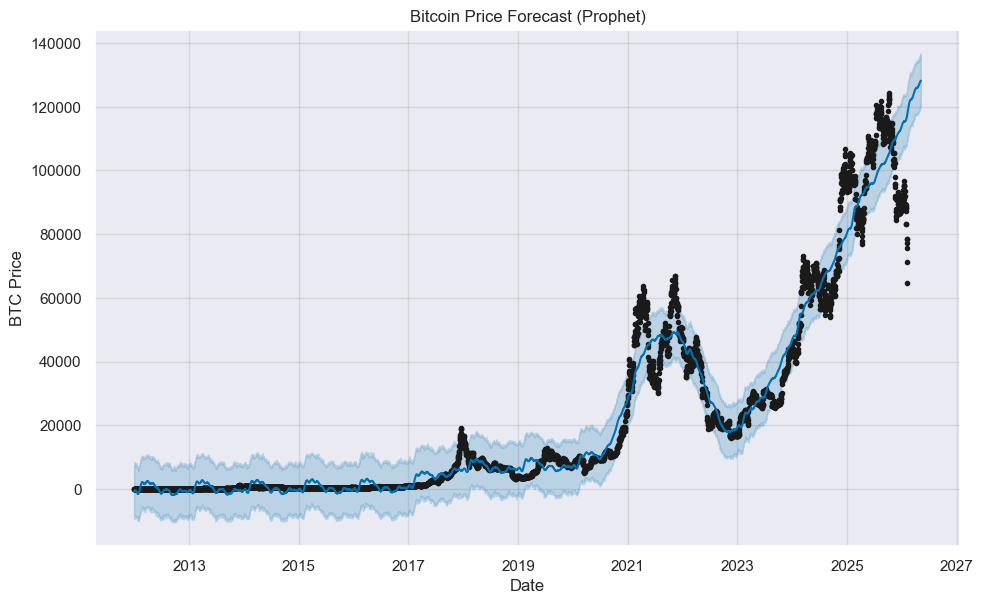

In [30]:
fig1 = model.plot(forecast)
plt.title("Bitcoin Price Forecast (Prophet)")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.show()

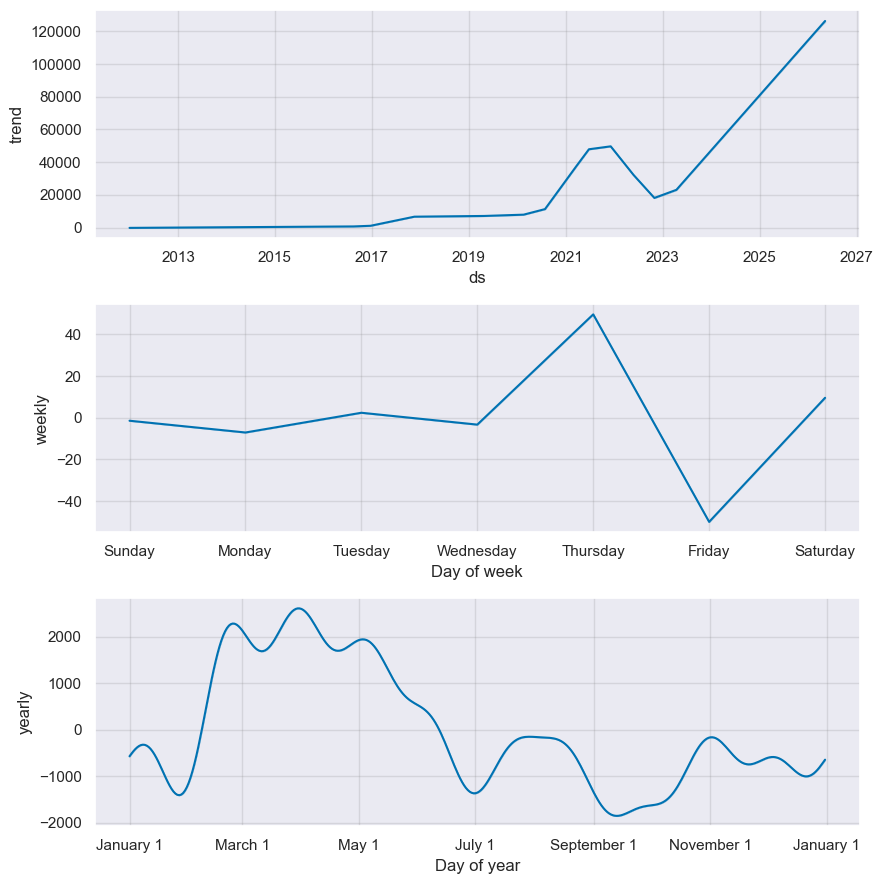

In [31]:
fig2 = model.plot_components(forecast)
plt.show()

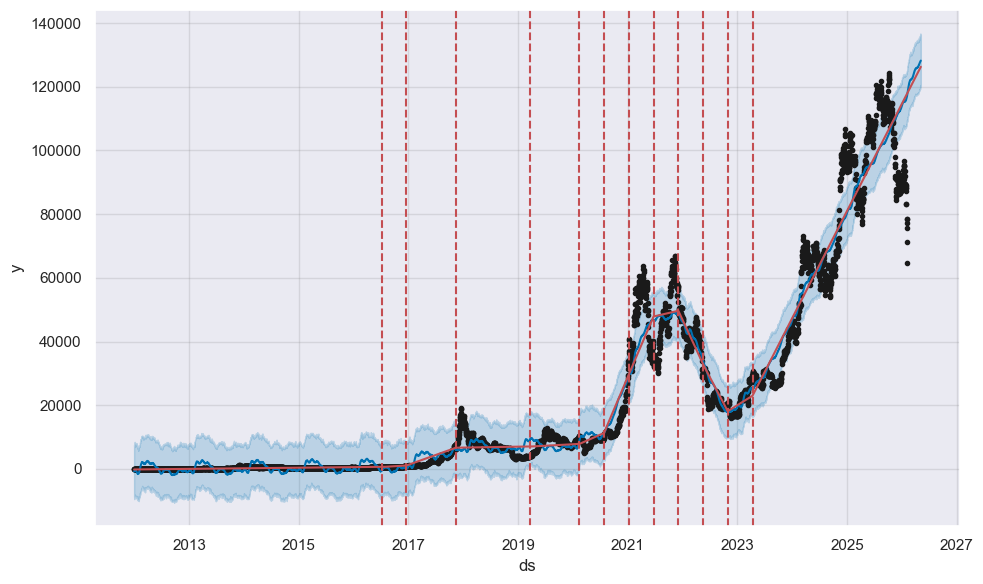

In [32]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [33]:
df_cv = cross_validation(
    model,
    initial='730 days',
    period='180 days',
    horizon='90 days'
)

df_perf = performance_metrics(df_cv)
df_perf.head()

  0%|          | 0/25 [00:00<?, ?it/s]

13:27:26 - cmdstanpy - INFO - Chain [1] start processing
13:27:26 - cmdstanpy - INFO - Chain [1] done processing
13:27:26 - cmdstanpy - INFO - Chain [1] start processing
13:27:27 - cmdstanpy - INFO - Chain [1] done processing
13:27:27 - cmdstanpy - INFO - Chain [1] start processing
13:27:27 - cmdstanpy - INFO - Chain [1] done processing
13:27:27 - cmdstanpy - INFO - Chain [1] start processing
13:27:28 - cmdstanpy - INFO - Chain [1] done processing
13:27:28 - cmdstanpy - INFO - Chain [1] start processing
13:27:29 - cmdstanpy - INFO - Chain [1] done processing
13:27:29 - cmdstanpy - INFO - Chain [1] start processing
13:27:30 - cmdstanpy - INFO - Chain [1] done processing
13:27:30 - cmdstanpy - INFO - Chain [1] start processing
13:27:30 - cmdstanpy - INFO - Chain [1] done processing
13:27:31 - cmdstanpy - INFO - Chain [1] start processing
13:27:31 - cmdstanpy - INFO - Chain [1] done processing
13:27:32 - cmdstanpy - INFO - Chain [1] start processing
13:27:32 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,1.740015e+08,13190.963592,8287.265241,0.395183,0.272428,0.364911,0.266667
1,10 days,1.816995e+08,13479.594667,8477.313845,0.401312,0.282467,0.372302,0.248889
2,11 days,1.901258e+08,13788.612484,8701.382346,0.408119,0.288250,0.380512,0.226667
3,12 days,1.982305e+08,14079.435450,8922.073354,0.415384,0.295049,0.388202,0.217778
4,13 days,2.056347e+08,14339.968541,9129.962710,0.422673,0.300224,0.395227,0.217778


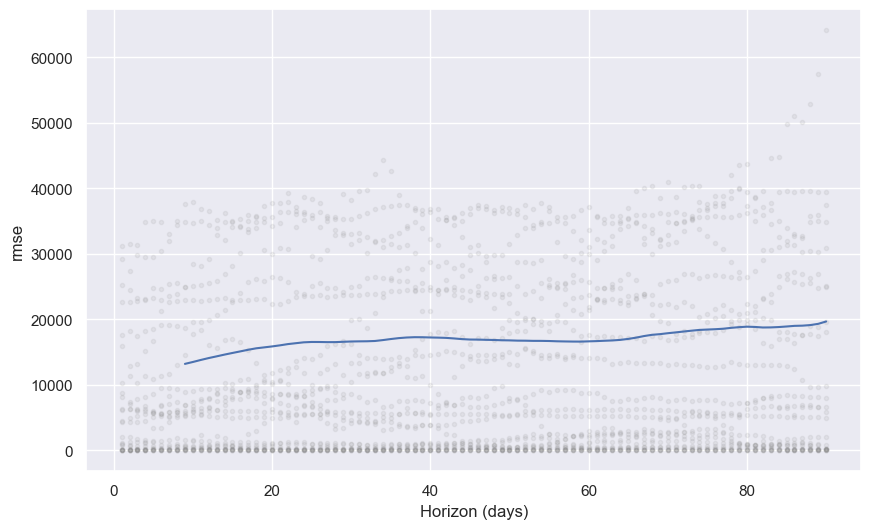

In [34]:
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

## Inference

today's date is 6 January 2026, and I will try to make model inference prediction on BTC price (USD) for next 7 days

In [ ]:
future_7d = model.make_future_dataframe(periods=7)
forecast_7d = model.predict(future_7d)

In [36]:
inference_7d = forecast_7d[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
inference_7d

,ds,yhat,yhat_lower,yhat_upper
5151,2026-02-07,117875.178099,110052.044870,125849.324036
5152,2026-02-08,118160.676643,109984.411820,126316.498581
5153,2026-02-09,118457.905494,110455.855887,126139.172924
5154,2026-02-10,118773.518225,110253.129981,126922.850321
5155,2026-02-11,119074.067851,111108.994783,127130.272688
5156,2026-02-12,119430.196982,111415.153403,127799.777652
5157,2026-02-13,119627.659540,111095.265118,128401.596004


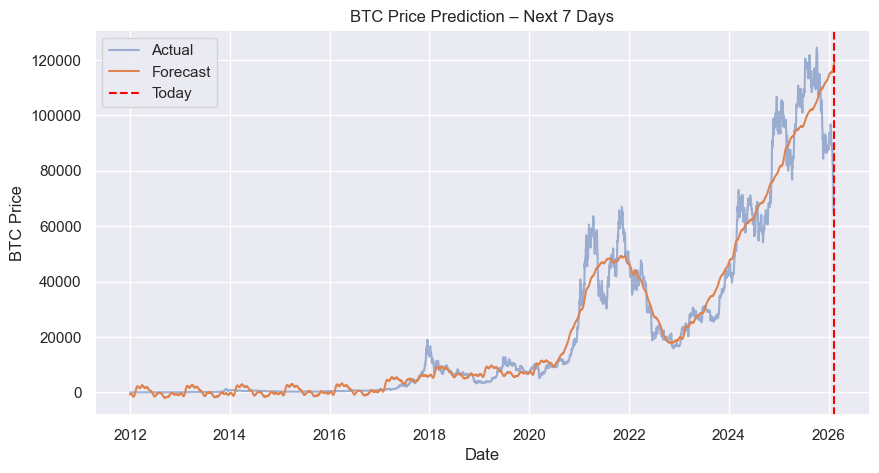

In [37]:
plt.figure(figsize=(10,5))

plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual', alpha=0.5)
plt.plot(forecast_7d['ds'], forecast_7d['yhat'], label='Forecast')

plt.axvline(prophet_df['ds'].iloc[-1], color='red', linestyle='--', label='Today')

plt.title('BTC Price Prediction – Next 7 Days')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.show()